In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_excel('Анализ TU - AminA.xlsx', sheet_name='Лист5')
data['Take Up Rate'] = data['Сумма выдачи'] / data['Запрошенная сумма']

data

,Номер заявки,Дата заведения заявки,Неделя,Цель,Канал,Статус заявки,Признак рассмотрения,Запрошенная сумма,Максимально одобренная сумма,Коэфф одобр суммы,группа коэфф,Дата фактической выдачи,Сумма выдачи,CUSTOMERGROUPCODE,UTM_SOURSE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_CONTENT,UTM_TERM,Take Up Rate
0,Д\286\009415428,45317,4,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,2000000.00,2173913.00,1.09,1.10,45317.0,2173913.00,B,,,,,,1.086957
1,Д\286\009360282,45309,3,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,4000000.00,1000000.00,0.25,0.25,45309.0,1000000.00,A,,,,,,0.250000
2,Д\286\009398245,45315,4,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,520224.78,565461.72,1.09,1.10,45315.0,520224.78,C,,,,,,1.000000
3,Д\286\009433319,45320,5,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,1000000.00,1000000.00,1.00,1.10,45320.0,1000000.00,B,google,bereke_credit_bezzaloga_web_google_search_all-...,cpl,freedom-finance-credit,фридом банк,1.000000
4,Д\286\009433442,45320,5,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,1500000.00,1630434.00,1.09,1.10,45321.0,1630434.00,B,,,,,,1.086956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68972,Д\286\009636815,45350,9,На рефинансирование займа и потребительские цели,NEW САЙТ,Отказ системы,Рассмотрено,1591170.37,NaN,NaN,NaN,NaN,NaN,B,,,,,,NaN
68973,Д\286\009367850,45310,3,На потребительские цели,NEW САЙТ,Отказ системы,Рассмотрено,1000000.00,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,NaN
68974,Д\286\009664876,45354,9,На потребительские цели,NEW САЙТ,Заявки калькуляторы,NaN,1500000.00,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,NaN
68975,Д\286\009748242,45366,11,На потребительские цели,NEW САЙТ,Отказ системы,Рассмотрено,750000.00,NaN,NaN,NaN,NaN,NaN,NaN,google,bereke_credit_bezzaloga_web_google_pmax_cpa_26...,cpl,pmax-2,,NaN


### Объем заявок по группам клиента

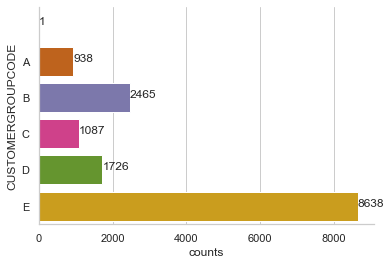

In [29]:
df = data.groupby('CUSTOMERGROUPCODE').size().reset_index(name='counts')
palette = sns.color_palette("Dark2", len(df))
sns.barplot(y='CUSTOMERGROUPCODE', x='counts', data=df, palette=palette)
for index, value in enumerate(df['counts']):
    plt.text(value, index, str(value)) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### Статистики по группам клиента

In [27]:
# Расчет take up rate
df= data[data['Статус заявки']=='Одобрено АА'].copy()
 
grouped_data = df.groupby('CUSTOMERGROUPCODE')['Take Up Rate'].agg(
    Mean='mean', 
    Median='median', 
    STD='std'
).reset_index()
 

def highlight_max(s):
    ''' Highlight the maximum in a Series yellow. '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    '''  Highlight the minimum in a Series red. '''
    is_min = s == s.min()
    return ['background-color: lightcoral' if v else '' for v in is_min]

styled_table = grouped_data.style.apply(highlight_max, subset=['Mean', 'Median', 'STD']).apply(highlight_min, subset=['Mean', 'Median', 'STD'])

styled_table

,CUSTOMERGROUPCODE,Mean,Median,STD
0,A,0.927807,1.043232,0.268047
1,B,0.918909,1.000000,0.357710
2,C,0.864403,1.000000,0.270538
3,D,0.912833,1.000000,0.283173
4,E,1.086953,1.086953,nan


In [ ]:
# cреднее значение (Mean TU), 
# медиана (Median TU)
# стандартное отклонение (STD TU)   

Из этой таблицы видно, что:

1) Группа E имеет наивысшее среднее значение TU. Медианное значение равно среднему, что указывает на отсутствие значительных выбросов в этой группе. Данные однородные. Указывает на то, что в среднем клиенты этой группы получили больше средств, чем запрашивали. 

2) Для групп A, B, C, и D медианный take up rate равен 1 или выше, значит, что в этих группах много случаев, когда клиенты получали сумму равную или больше запрошенной.
     2.1) (!) При этом группа B демонстрирует наибольшую STD (около 0.35), что говорит о значительных колебаниях в отношении выданных сумм к запрошенным в этой группе.

In [ ]:
Дальше можно сконцентрироваться на:
    1) группе B
    2) на заявках с низким показателем TU в разбивке групп 
        / по какой причине клиенты не взяли, когда им одобрили? Скорее всего из-за меньшей одобр.суммы
    3) какое распределение

### Распределения Сумма выдачи vs Запрошенная сумма

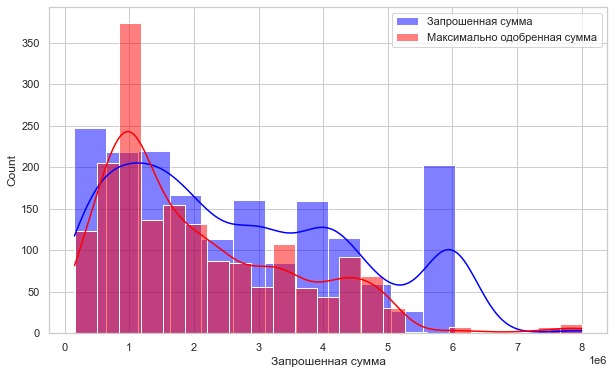

In [53]:
df= data[data['Статус заявки']=='Одобрено АА'].copy()

plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x='Запрошенная сумма', color='blue', label='Запрошенная сумма', kde=True)
sns.histplot(data=df, x='Максимально одобренная сумма', color='red', label='Максимально одобренная сумма', kde=True)
plt.legend()
plt.show()

### Низкие значения TU в группе B

In [41]:
low_tu_group_b = data[(data['CUSTOMERGROUPCODE'] == 'B') & (data['Take Up Rate'] < 1)]
low_tu_group_b

,Номер заявки,Дата заведения заявки,Неделя,Цель,Канал,Статус заявки,Признак рассмотрения,Запрошенная сумма,Максимально одобренная сумма,Коэфф одобр суммы,группа коэфф,Дата фактической выдачи,Сумма выдачи,CUSTOMERGROUPCODE,UTM_SOURSE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_CONTENT,UTM_TERM,Take Up Rate
6,Д\286\009464477,45325,5,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,4479754.29,2827823.08,0.63,0.75,45325.0,2827823.08,B,google,bereke_credit_bezzaloga_web_google_search_bran...,ocpc,brand-ocpc,bereke bank кредит,0.631245
21,Д\286\009436987,45321,5,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,6000000.00,1403571.00,0.23,0.25,45331.0,1403571.00,B,google,bereke_credit_bezzaloga_web_google_pmax_cpa_26...,cpl,pmax,,0.233929
23,Д\286\009385042,45313,4,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,3700000.00,1149169.00,0.31,0.50,45313.0,1149169.00,B,,,,,,0.310586
33,Д\286\009412670,45317,4,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,6000000.00,1000000.00,0.17,0.25,45317.0,1000000.00,B,,,,,,0.166667
43,Д\286\009451240,45323,5,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,2611894.00,1201677.35,0.46,0.50,45323.0,1201677.35,B,google,bereke_credit_bezzaloga_web_google_pmax_cpa_26...,cpl,pmax,,0.460079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Д\286\009772478,45370,12,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,3600000.00,2555227.00,0.71,0.75,45370.0,2447255.00,B,,,,,,0.679793
887,Д\286\009775216,45370,12,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,3000000.00,1000000.00,0.33,0.50,45370.0,1000000.00,B,google,bereke_credit_bezzaloga_web_google_search_bran...,ocpc,brand-ocpc,береке банк кредит,0.333333
891,Д\286\009786664,45371,12,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,3421570.58,2365558.37,0.69,0.75,45372.0,2365558.37,B,,,,,,0.691366
893,Д\286\009667672,45355,10,На потребительские цели,NEW САЙТ,Одобрено АА,Рассмотрено,5500000.00,5000000.00,0.91,1.10,45355.0,5000000.00,B,,,,,,0.909091


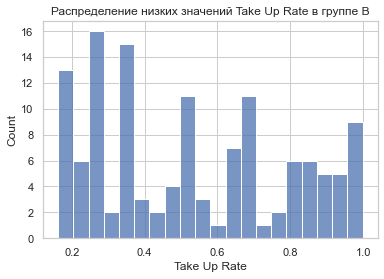

In [40]:
sns.histplot(low_tu_group_b['Take Up Rate'], bins=20)
plt.title('Распределение низких значений Take Up Rate в группе B')
plt.show() 

In [52]:
complex_aggr = low_tu_group_b.groupby(['Цель', 'Канал'], as_index=False).agg({
                'Номер заявки': 'count',   
                'Запрошенная сумма': 'mean',             
                'Максимально одобренная сумма': 'mean',            
                'Коэфф одобр суммы': 'mean'  ,        
                'Сумма выдачи': lambda x: x.quantile(0.75)  # по 75 перцентилю 
}).rename(columns={'Номер заявки': 'count заявки', 'Запрошенная сумма': 'Ср.Запрош.сумма'
     , 'Максимально одобренная сумма': 'Ср.максодобренная сумма', 'Коэфф одобр суммы': 'ср коэфф одобр.суммы'})
round(complex_aggr,2)

,Цель,Канал,count заявки,Ср.Запрош.сумма,Ср.максодобренная сумма,ср коэфф одобр.суммы,Сумма выдачи
0,На потребительские цели,NEW САЙТ,102,3704411.76,1701549.39,0.49,1858482.25
1,На рефинансирование займа и потребительские цели,NEW САЙТ,26,4303464.90,2993607.65,0.70,3844241.99


In [ ]:
(!) Признаки низких значени TU в группе B -> по каналу new сайт и по потребительской цели

### Анализ заявок с низким TU

In [67]:
low_approval_coeff = data[data['Коэфф одобр суммы'] < 1]
no_take_up = low_approval_coeff[pd.isna(low_approval_coeff['Сумма выдачи'])]
low_take_up = low_approval_coeff.dropna(subset=['Сумма выдачи'])

total_low_approval = len(low_approval_coeff['Номер заявки'].unique())
no_take_up_count = len(no_issue['Номер заявки'].unique())
low_take_up_count = len(low_take_up['Номер заявки'].unique())

total = len(data['Номер заявки'].unique())
print(f"Всего заявок : {total}")

print(f"Всего заявок с низким коэф: {total_low_approval} ", round(total_low_approval/total*100,2),'%')
print(f"Заявок без выдачи суммы: {no_take_up_count} ", round(no_take_up_count/total*100,2) ,'%')
print(f"Заявок с выдачей суммы, но c низким коэф: {low_take_up_count} "
      ,round(low_take_up_count/total*100,2),'%')

Всего заявок : 68977
Всего заявок с низким коэф: 694  1.01 %
Заявок без выдачи суммы: 458  0.66 %
Заявок с выдачей суммы, но c низким коэф: 236  0.34 %


### Заявки без выдачи суммы

In [82]:
quantiles = no_take_up['Запрошенная сумма'].quantile([0.2, 0.4, 0.6, 0.8])

no_take_up['quantile_range'] = pd.qcut(no_take_up['Запрошенная сумма'], q=[0, 0.2, 0.4, 0.6, 0.8, 1])
pivot_quantiles = no_take_up.pivot_table(values='Номер заявки', index='quantile_range', 
                                   columns='CUSTOMERGROUPCODE', aggfunc='count')

pivot_quantiles

/var/folders/ts/9c65r4gs4sqdfggp7k73h4ww0000gn/T/ipykernel_12402/1053244219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_take_up['quantile_range'] = pd.qcut(no_take_up['Запрошенная сумма'], q=[0, 0.2, 0.4, 0.6, 0.8, 1])


CUSTOMERGROUPCODE,A,B,C,D,E
quantile_range,,,,,
"(399192.999, 2763459.606]",14,33,15,29,1
"(2763459.606, 4048399.2]",15,42,15,19,0
"(4048399.2, 5719610.614]",13,39,20,20,0
"(5719610.614, 6000000.0]",33,69,27,27,0
"(6000000.0, 8000000.0]",14,10,2,1,0


In [92]:
no_take_up[['Номер заявки', 'Неделя', 'Цель', 'Канал',
       'Статус заявки', 'Запрошенная сумма',
       'Максимально одобренная сумма', 'Коэфф одобр суммы', 'группа коэфф',
       'Дата фактической выдачи', 'Сумма выдачи', 'CUSTOMERGROUPCODE',
       'UTM_SOURSE', 'UTM_CAMPAIGN', 'UTM_MEDIUM', 'UTM_CONTENT', 'UTM_TERM',
       'Take Up Rate']]

,Номер заявки,Неделя,Цель,Канал,Статус заявки,Запрошенная сумма,Максимально одобренная сумма,Коэфф одобр суммы,группа коэфф,Дата фактической выдачи,Сумма выдачи,CUSTOMERGROUPCODE,UTM_SOURSE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_CONTENT,UTM_TERM,Take Up Rate
246,Д\286\009792203,12,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,4083850.00,1035666.34,0.25,0.25,NaN,NaN,C,,,,,,NaN
257,Д\286\009765270,12,На потребительские цели,NEW САЙТ,Одобрено АА,4000000.00,1000000.00,0.25,0.25,NaN,NaN,C,,,,,,NaN
367,Д\286\009539030,7,На потребительские цели,NEW САЙТ,Одобрено АА,6000000.00,3826087.00,0.64,0.75,NaN,NaN,B,google,bereke_credit_bezzaloga_web_google_search_bran...,ocpc,brand-ocpc,береке банк кредит,NaN
438,Д\286\009799010,12,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,3651870.88,2276137.48,0.62,0.75,NaN,NaN,D,,,,,,NaN
630,Д\286\009808151,13,На потребительские цели,NEW САЙТ,Одобрено АА,2000000.00,1000000.00,0.50,0.50,NaN,NaN,B,google,bereke_credit_bezzaloga_web_google_search_bran...,ocpc,brand-ocpc,bereke bank кредит,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,Д\286\009723759,11,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,6000000.00,1204516.51,0.20,0.25,NaN,NaN,D,google,bereke_credit_bezzaloga_web_google_pmax_cpa_26...,cpl,pmax-2,,NaN
68668,Д\286\009602562,8,На потребительские цели,NEW САЙТ,Одобрено АА,4000000.00,3754042.00,0.94,1.10,NaN,NaN,B,google,bereke_credit_bezzaloga_web_google_pmax_cpa_26...,cpl,pmax,.,NaN
68785,Д\286\009720880,11,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,1520315.00,1217184.72,0.80,0.90,NaN,NaN,B,affiliate,doit,cpa,doit_credit_vitrina_2024,,NaN
68811,Д\286\009708708,11,На рефинансирование займа и потребительские цели,NEW САЙТ,Одобрено АА,4695836.26,1394419.38,0.30,0.50,NaN,NaN,B,,,,,,NaN


### Заявок с выдачей суммы, но c низким коэф

In [89]:
quantiles = low_take_up['Запрошенная сумма'].quantile([0.2, 0.4, 0.6, 0.8])

low_take_up['quantile_range'] = pd.qcut(low_take_up['Запрошенная сумма'], q=[0, 0.2, 0.4, 0.6, 0.8, 1])
pivot_quantiles = low_take_up.pivot_table(values='Номер заявки', index='quantile_range', 
                                   columns='CUSTOMERGROUPCODE', aggfunc='count')

pivot_quantiles

/var/folders/ts/9c65r4gs4sqdfggp7k73h4ww0000gn/T/ipykernel_12402/1029468381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_take_up['quantile_range'] = pd.qcut(low_take_up['Запрошенная сумма'], q=[0, 0.2, 0.4, 0.6, 0.8, 1])


CUSTOMERGROUPCODE,A,B,C,D
quantile_range,,,,
"(512610.83900000004, 2000000.0]",7,24,8,9
"(2000000.0, 3172189.6]",5,24,9,9
"(3172189.6, 4492494.0]",6,27,9,5
"(4492494.0, 6000000.0]",12,45,14,14
"(6000000.0, 8000000.0]",8,1,0,0


In [ ]:
1) группа А это самый качественный клиент? почему им отказали в диапазоне сумм [5719610.614, 6000000.0] и ниже?